<a href="https://colab.research.google.com/github/thegeeklife/ML_Assignments/blob/main/HW7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 7 
### Subia Ansari

# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(623)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Activation functions

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [3]:
import tensorflow as tf
from tensorflow import keras

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [5]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [6]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

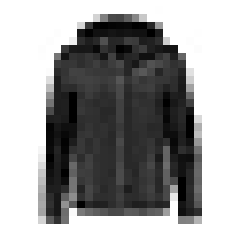

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [11]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

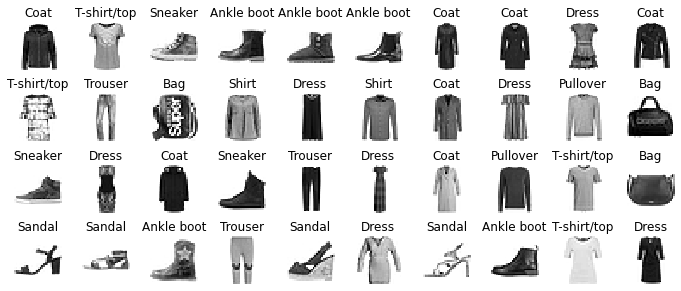

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_diagram', tight_layout=False)
plt.show()

# Common Functions

In [17]:
import pandas as pd 

def display_model(model):
  print(model.summary())
  keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)


def model_train_evaluate(model):
  hidden1 = model.layers[1]
  #print("Hidden layer: ",hidden1.name)
  weights, biases = hidden1.get_weights()
  #print("Weights: ",weights,"  biases: ", biases)
  model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
  history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
  
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)  
  plt.gca().set_ylim(0, 1)
  #save_fig("keras_learning_curves_graph")
  plt.show()
  model.evaluate(X_test, y_test)

# Model 1 : The first default model

2 layers with 'Relu' activation and units: 300, 100, 10 in each layer

In [56]:
np.random.seed(623)
tf.random.set_seed(623)

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))



In [57]:
display_model(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


Hidden layer:  dense
Weights:  [[-0.01384548 -0.0250012  -0.02452028 ... -0.06337698 -0.05598773
  -0.05677184]
 [ 0.02866425 -0.02819074  0.05186923 ...  0.04102793  0.0250009
   0.02032746]
 [-0.00910276 -0.00252632 -0.0692094  ... -0.01484704  0.04485239
   0.01138088]
 ...
 [ 0.05550484  0.04162674 -0.00757756 ...  0.06579117 -0.05567639
  -0.0559999 ]
 [ 0.04072996 -0.05197743  0.00049014 ...  0.06818182 -0.0646909
   0.00032752]
 [ 0.03763833 -0.02659738  0.03700991 ...  0.03650448 -0.06101772
   0.04291554]]   biases:  [ 1.49201661e-01 -1.12582836e-02 -2.02385965e-03  1.38618220e-02
  7.43071288e-02  1.49449483e-01  4.05635498e-02 -3.29283997e-02
  4.11080047e-02  2.66744401e-02  1.37680501e-01 -1.65731143e-02
  1.15389414e-01  1.43630713e-01  7.26189613e-02  2.22802479e-02
  5.59331961e-02  7.22124651e-02 -4.74118590e-02  9.81998746e-04
  9.32232942e-03  1.01339743e-01  2.40047108e-02  1.19626567e-01
  9.37287975e-03  1.84420347e-02  3.43834162e-02  3.28577831e-02
 -2.05312073e

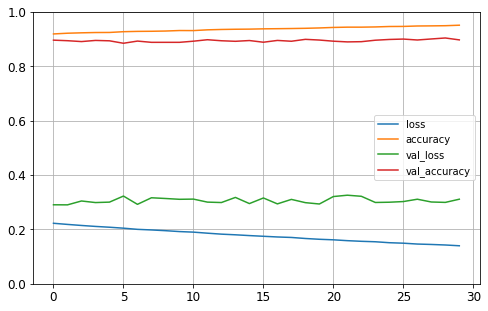

313/313 [==============================] - 1s 2ms/step - loss: 0.3553 - accuracy: 0.8851


In [58]:
model_train_evaluate(model)

**Warning**: the following 2 cells do not work yet due to [TensorFlow issue 24622](https://github.com/tensorflow/tensorflow/issues/24622) (you are using a preview version of TensorFlow, hence there are still a few issues).
You can work around this issue by applying [PR 24626](https://github.com/tensorflow/tensorflow/pull/24625/files) to your copy of `tensorflow/python/keras/utils/vis_utils.py`.

# Model 2

2 layers with 'Relu' and units 500, 200 and 10 in the layers respectively

In [65]:
model_2 = keras.models.Sequential()
model_2.add(keras.layers.Flatten(input_shape=[28, 28]))
model_2.add(keras.layers.Dense(500, activation="relu"))
model_2.add(keras.layers.Dense(200, activation="relu"))
model_2.add(keras.layers.Dense(10, activation="sigmoid"))

In [66]:
display_model(model_2)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_55 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_56 (Dense)             (None, 10)                2010      
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________
None


Hidden layer:  dense_54
Weights:  [[-0.05423449  0.0041114  -0.00679646 ... -0.02575376  0.03716694
  -0.0335729 ]
 [-0.0173666   0.01807562 -0.00912027 ...  0.04526751  0.06474078
  -0.02786964]
 [ 0.03250488  0.00742275 -0.01647461 ...  0.02090743  0.0554803
  -0.03246703]
 ...
 [-0.04243451  0.04957107 -0.04466772 ... -0.05568491 -0.02843205
   0.02573107]
 [ 0.03300337 -0.04387422  0.05483546 ... -0.05467356  0.05939781
   0.02839683]
 [ 0.04906595  0.05966832  0.01148383 ...  0.06417134 -0.02905406
  -0.05207765]]   biases:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0

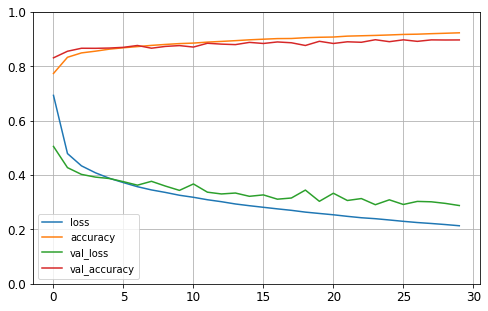

313/313 [==============================] - 1s 2ms/step - loss: 0.3248 - accuracy: 0.8848


In [67]:
model_train_evaluate(model_2)

# Model 3:

5 layers, units: 300, 200, 150, 100, 50 and 10 in the layers.

In [62]:
model_3 = keras.models.Sequential()
model_3.add(keras.layers.Flatten(input_shape=[28, 28]))
model_3.add(keras.layers.Dense(300, activation="relu"))
model_3.add(keras.layers.Dense(200, activation="relu"))
model_3.add(keras.layers.Dense(150, activation="relu"))
model_3.add(keras.layers.Dense(100, activation="relu"))
model_3.add(keras.layers.Dense(50, activation="relu"))
model_3.add(keras.layers.Dense(10, activation="sigmoid"))

display_model(model_3)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_43 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_44 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_45 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_46 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_47 (Dense)             (None, 10)               

Hidden layer:  dense_42
Weights:  [[-0.05678848 -0.03203875  0.05579263 ... -0.06610628  0.03028055
   0.04251494]
 [ 0.05546762 -0.03209741  0.04322055 ... -0.01301263 -0.06584503
  -0.0104987 ]
 [-0.03447153  0.06502059 -0.06684531 ...  0.04196914 -0.04333535
   0.01571879]
 ...
 [-0.03302939 -0.00037406 -0.00990485 ... -0.02553286  0.06770428
  -0.05674318]
 [ 0.03418241  0.05275573  0.0471497  ... -0.05637195  0.00038204
   0.05551596]
 [-0.03396418 -0.01608212 -0.04436725 ...  0.05253771  0.05835016
   0.07326458]]   biases:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 

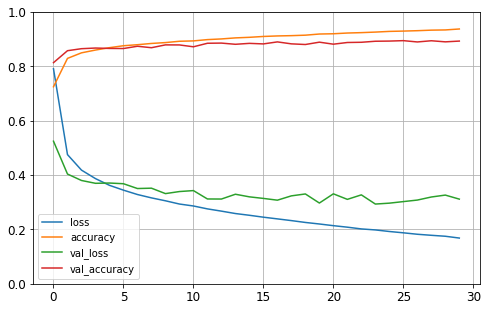

313/313 [==============================] - 1s 2ms/step - loss: 0.3632 - accuracy: 0.8803


In [63]:
model_train_evaluate(model_3)

# Model 4

5 layers, units in layers: 700, 500, 400, 300, 150 and 10

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 700)               549500    
_________________________________________________________________
dense_49 (Dense)             (None, 500)               350500    
_________________________________________________________________
dense_50 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_51 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_52 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_53 (Dense)             (None, 10)              

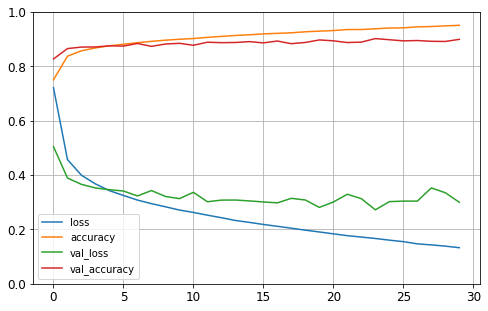

313/313 [==============================] - 2s 5ms/step - loss: 0.3544 - accuracy: 0.8875


In [64]:
model_4 = keras.models.Sequential()
model_4.add(keras.layers.Flatten(input_shape=[28, 28]))
model_4.add(keras.layers.Dense(700, activation="relu"))
model_4.add(keras.layers.Dense(500, activation="relu"))
model_4.add(keras.layers.Dense(400, activation="relu"))
model_4.add(keras.layers.Dense(300, activation="relu"))
model_4.add(keras.layers.Dense(150, activation="relu"))
model_4.add(keras.layers.Dense(10, activation="sigmoid"))

display_model(model_4)
model_train_evaluate(model_4)

# Model 5
 8 Layers with 

In [68]:
model_5 = keras.models.Sequential()
model_5.add(keras.layers.Flatten(input_shape=[28, 28]))
model_5.add(keras.layers.Dense(300, activation="relu")) #1
model_5.add(keras.layers.Dense(250, activation="relu")) #2
model_5.add(keras.layers.Dense(200, activation="relu")) #3 
model_5.add(keras.layers.Dense(150, activation="relu")) #4 
model_5.add(keras.layers.Dense(100, activation="relu"))  #5 
model_5.add(keras.layers.Dense(50, activation="relu")) #6
model_5.add(keras.layers.Dense(40, activation="relu")) #7
model_5.add(keras.layers.Dense(20, activation="relu")) #8
model_5.add(keras.layers.Dense(10, activation="sigmoid"))

display_model(model_5)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_58 (Dense)             (None, 250)               75250     
_________________________________________________________________
dense_59 (Dense)             (None, 200)               50200     
_________________________________________________________________
dense_60 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_61 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_62 (Dense)             (None, 50)              

Hidden layer:  dense_57
Weights:  [[ 0.06562595  0.02475683  0.0733407  ... -0.05230749 -0.00861038
  -0.06164649]
 [ 0.00578769 -0.07215122 -0.06277682 ... -0.04346393  0.0430169
   0.02664955]
 [ 0.06947748 -0.01193513 -0.00340614 ...  0.01488793  0.03257002
  -0.012432  ]
 ...
 [-0.03298347  0.06485693  0.07321434 ... -0.00751853 -0.0713152
   0.00739436]
 [ 0.04021317 -0.03396159  0.03102414 ...  0.04785707 -0.036466
  -0.01554601]
 [-0.04863131 -0.03318403  0.00862812 ... -0.00685875 -0.0139085
  -0.05265081]]   biases:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

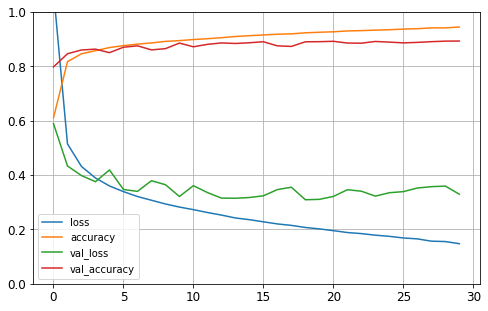

313/313 [==============================] - 1s 2ms/step - loss: 0.3819 - accuracy: 0.8821


In [69]:
model_train_evaluate(model_5)

# Model 6:

Same layers and units as Model 1, but with dropout layer included


In [19]:
model_6 = keras.models.Sequential()
model_6.add(keras.layers.Flatten(input_shape=[28, 28]))
model_6.add(keras.layers.Dense(300, activation="relu"))
model_6.add(keras.layers.Dropout(0.5))
model_6.add(keras.layers.Dense(100, activation="relu"))
model_6.add(keras.layers.Dropout(0.5))
model_6.add(keras.layers.Dense(10, activation="softmax"))


In [20]:
display_model(model_6)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_5 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
________________________________________________

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.4265 - accuracy: 0.4999 - val_loss: 0.5964 - val_accuracy: 0.7962
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7356 - accuracy: 0.7396 - val_loss: 0.5080 - val_accuracy: 0.8250
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6274 - accuracy: 0.7794 - val_loss: 0.4615 - val_accuracy: 0.8368
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5710 - accuracy: 0.8005 - val_loss: 0.4303 - val_accuracy: 0.8478
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5425 - accuracy: 0.8099 - val_loss: 0.4142 - val_accuracy: 0.8564
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5215 - accuracy: 0.8177 - val_loss: 0.3995 - val_accuracy: 0.8600
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5000 - accuracy: 0.8243 - val_loss: 0.3887 - val_accuracy:

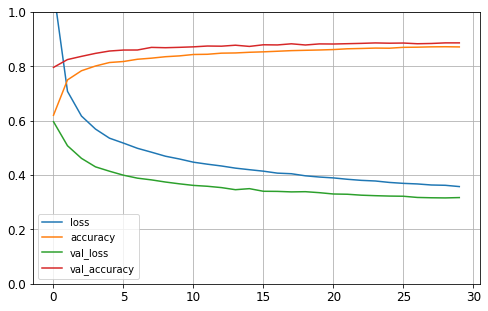

313/313 [==============================] - 0s 1ms/step - loss: 0.3541 - accuracy: 0.8743


In [21]:
model_train_evaluate(model_6)